#Problem Statement
Yulu, India's leading micro-mobility service provider, is looking to understand the factors influencing the demand for shared electric cycles in the Indian market. The company has experienced a dip in revenues and has contracted a consulting company to explore the variables affecting the demand for these cycles. The main goal is to determine which factors are significant in predicting the demand and how well these variables describe the electric cycle rental demand.

#1. Define the Problem Statement
Yulu seeks to identify the factors that significantly influence the demand for shared electric cycles in the Indian market. The aim is to use this understanding to predict demand accurately and address the revenue dip by focusing on impactful variables.

Key Questions:

#####Which variables significantly predict the demand (i.e., count)?
#####How well do these variables explain the observed trends in demand?

###Importing Libraries and Dataset
Start by importing necessary libraries and loading the dataset for analysis.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load dataset
df = pd.read_csv('/content/bike_sharing.csv')

# Check the first few rows of the dataset
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [69]:
# Check the data types and missing values
df.info()

# Check for missing values
df.isnull().sum()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [70]:
# Convert 'datetime' to datetime object and extract useful components
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year


In [71]:
df.columns


Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'day', 'month', 'year'],
      dtype='object')

In [72]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


Column Profiling:

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)


workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
weather:
1: Clear, Few clouds, partly cloudy, partly cloudy

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users
registered: count of registered users
count: count of total rental bikes including both casual and registered


In [73]:
#Is there any null value in the dataset ?
np.any(df.isna())


False

In [74]:
#Is there any duplicated values in the dataset ?
np.any(df.duplicated())

False

In [75]:
#Datatype of the columns
df.dtypes

,0
datetime,datetime64[ns]
season,int64
holiday,int64
workingday,int64
weather,int64
temp,float64
atemp,float64
humidity,int64
windspeed,float64
casual,int64


In [76]:
# Convert categorical variables to category type
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
for col in categorical_cols:
    df[col] = df[col].astype('category')


In [77]:
#What is the time period for which the data is given ?

df['datetime'].min()


Timestamp('2011-01-01 00:00:00')

In [78]:
df['datetime'].max()


Timestamp('2012-12-19 23:00:00')

In [79]:
df['datetime'].max() - df['datetime'].min()


Timedelta('718 days 23:00:00')

In [80]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,year
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,2011
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,2011
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,2011
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,2011
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,2011


In [81]:
df.season.unique()

[1, 2, 3, 4]
Categories (4, int64): [1, 2, 3, 4]

In [82]:
# Summarize numerical variables
print("Statistical Summary:\n", df.describe())


Statistical Summary:
                             datetime         temp         atemp      humidity  \
count                          10886  10886.00000  10886.000000  10886.000000   
mean   2011-12-27 05:56:22.399411968     20.23086     23.655084     61.886460   
min              2011-01-01 00:00:00      0.82000      0.760000      0.000000   
25%              2011-07-02 07:15:00     13.94000     16.665000     47.000000   
50%              2012-01-01 20:30:00     20.50000     24.240000     62.000000   
75%              2012-07-01 12:45:00     26.24000     31.060000     77.000000   
max              2012-12-19 23:00:00     41.00000     45.455000    100.000000   
std                              NaN      7.79159      8.474601     19.245033   

          windspeed        casual    registered         count          hour  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      12.799395     36.021955    155.552177    191.574132     11.541613   
min        

In [83]:
# Save the cleaned dataset
df.to_csv('cleaned_yulu_data.csv', index=False)


#Univariate Analysis and Visualizations
1. Distribution of Numerical Variables
Use histograms and boxplots to understand the spread and detect outliers in numerical columns.

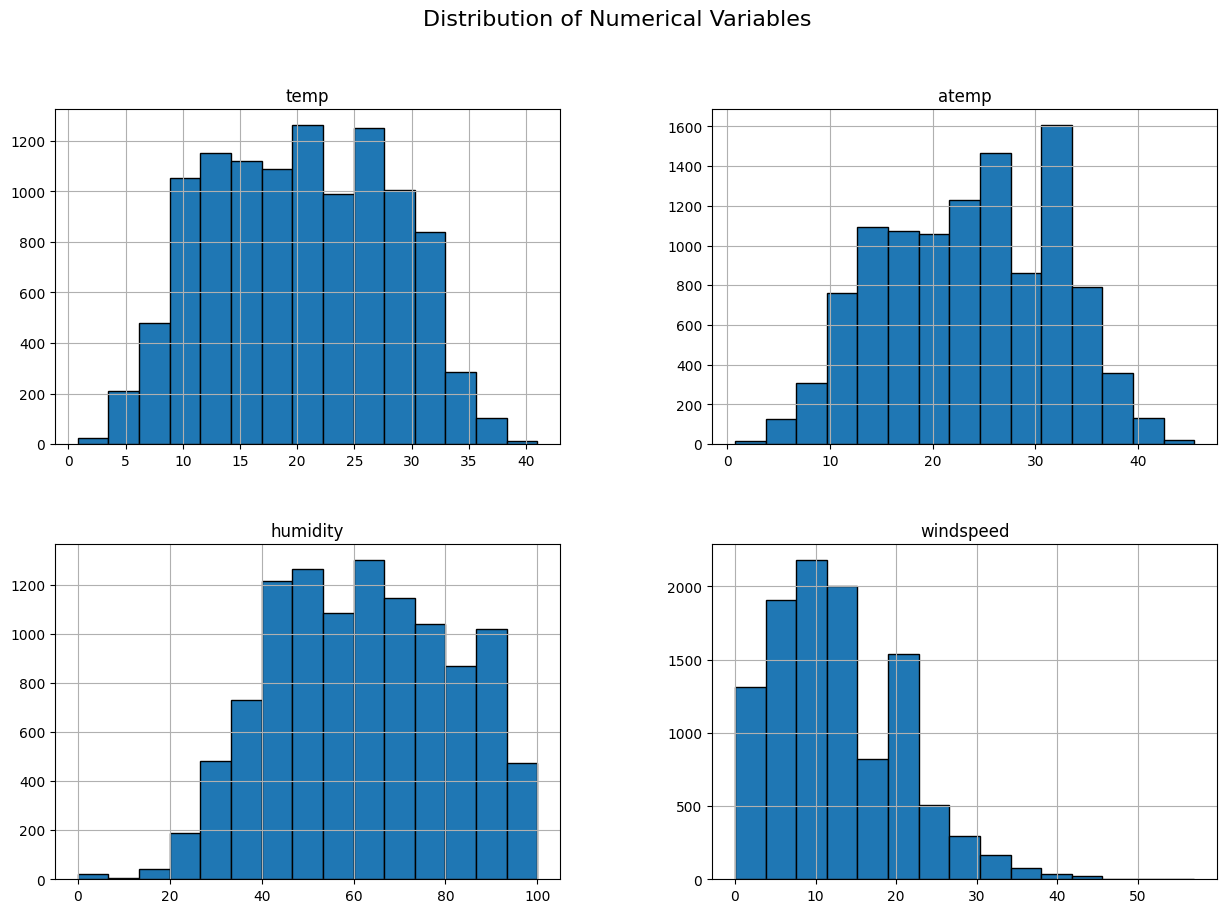

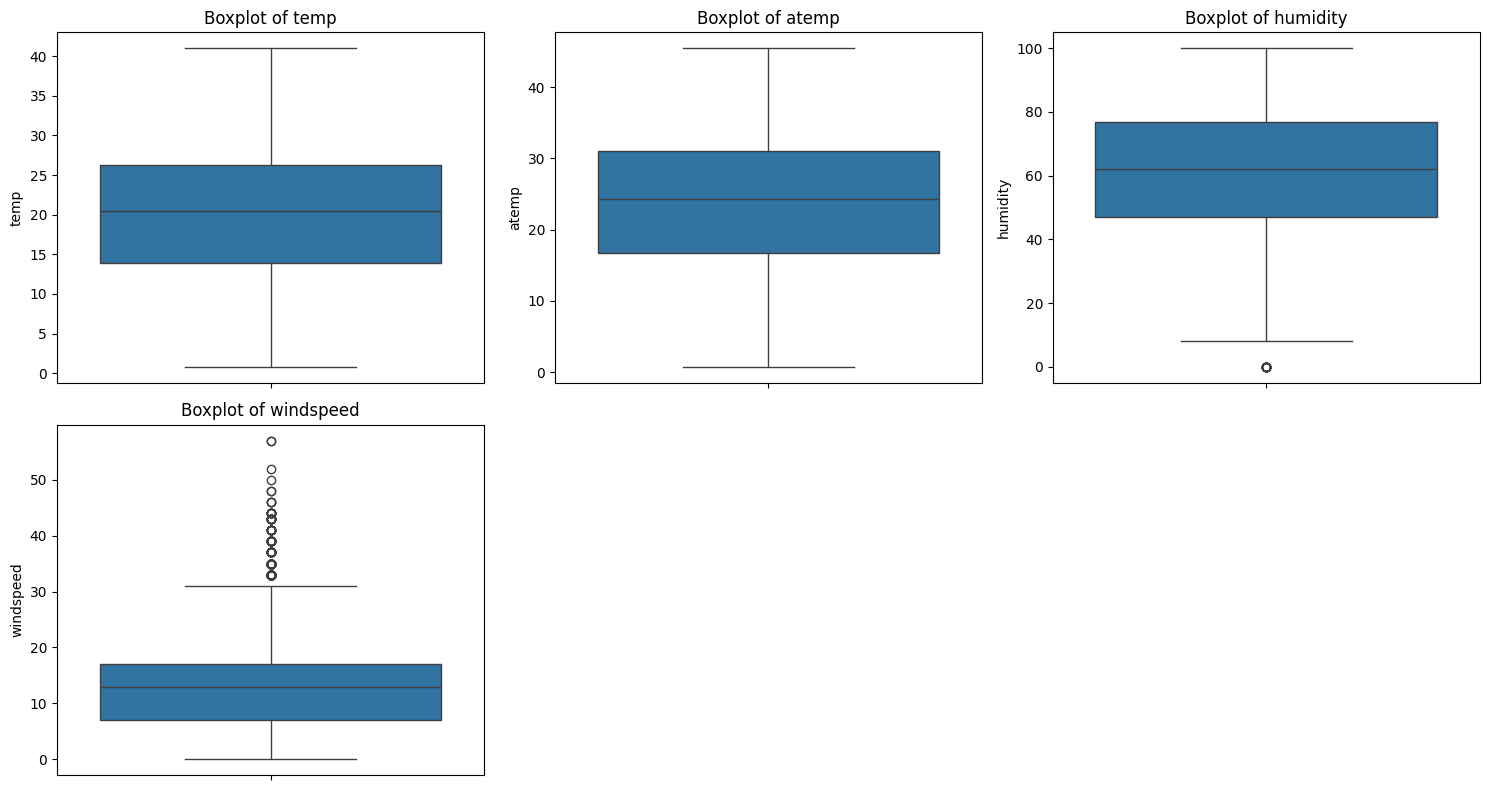

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical variables
numerical_cols = ['temp', 'atemp', 'humidity', 'windspeed']
df[numerical_cols].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


2. Countplots for Categorical Variables
Understand the frequency distribution of categorical columns (season, holiday, etc.).

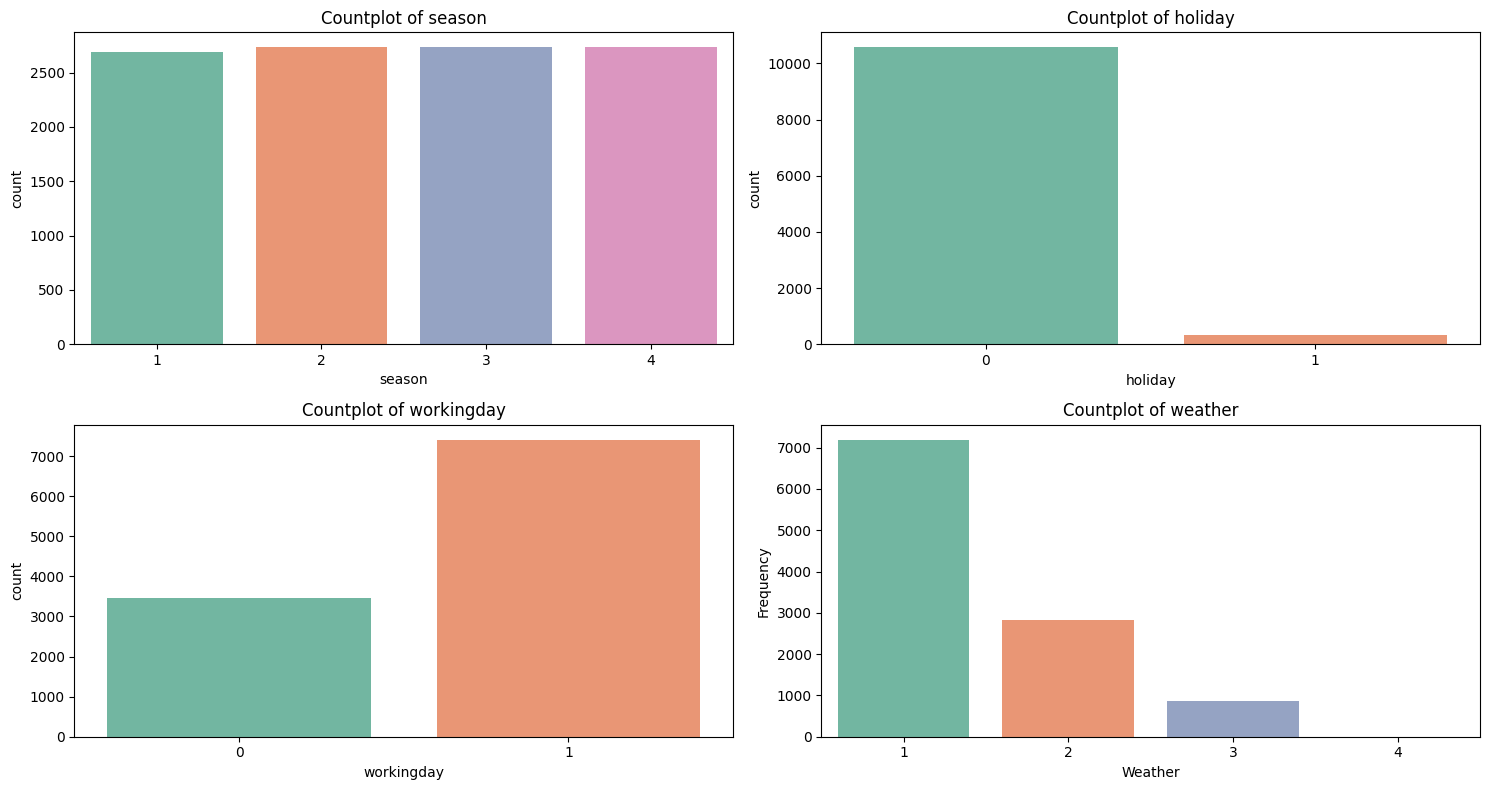

In [85]:
# Plot countplots for categorical variables
categorical_cols = ['season', 'holiday', 'workingday', 'weather']
plt.figure(figsize=(15, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f"Countplot of {col}")
plt.xlabel(col.capitalize())
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


#->> Observations From the plots:

Identify trends in numerical columns (e.g., skewness in count or presence of outliers in windspeed) -


*   the skewness of the windspeed is observed slight in the right side where in, it also has a considerable amount of outliers present in its distribution.

*   Less people rent Yulu when the windspeed is high.

Evaluate categorical columns for data balance (e.g., whether certain seasons dominate the dataset) -



*   People are more likely to rent a Yulu on a working day compared to that of a holidy.


*   When the weather conditions are a bit extreme in terms of a rain or a thunderstorm, People are not likely at all to rent a Yulu.




#Bivariate Analysis and Correlation

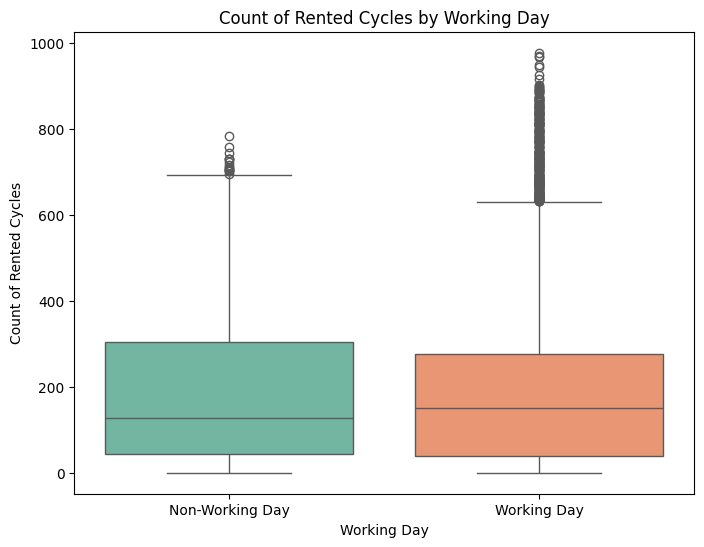

In [86]:
# Boxplot to show the distribution of 'count' for working day vs non-working day
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='workingday', y='count', palette='Set2')
plt.title('Count of Rented Cycles by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Count of Rented Cycles')
plt.xticks([0, 1], ['Non-Working Day', 'Working Day'])
plt.show()


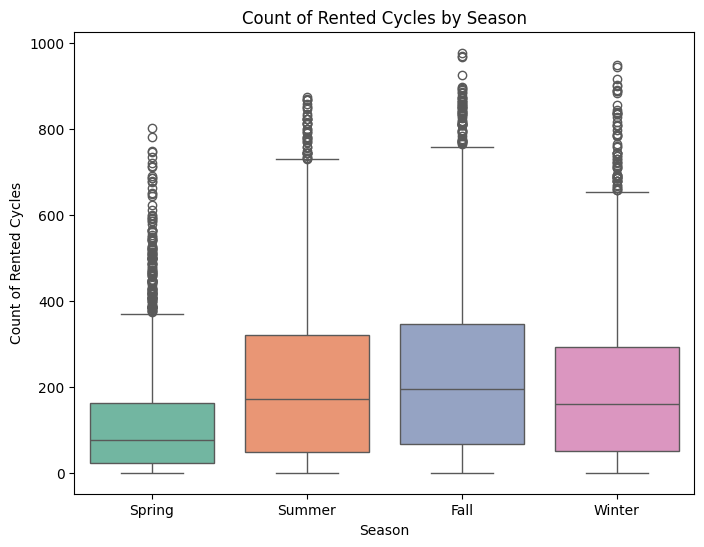

In [87]:
# Boxplot to show the distribution of 'count' by season
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='season', y='count', palette='Set2')
plt.title('Count of Rented Cycles by Season')
plt.xlabel('Season')
plt.ylabel('Count of Rented Cycles')
plt.xticks([0, 1, 2, 3], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.show()


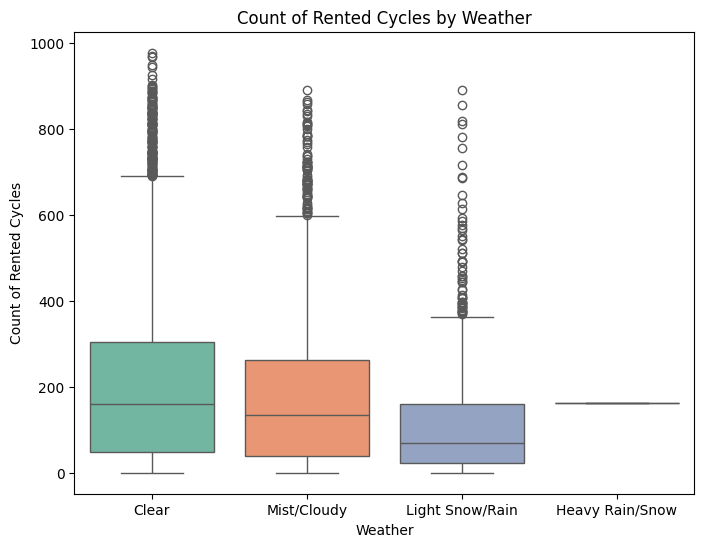

In [88]:
# Boxplot to show the distribution of 'count' by weather
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='weather', y='count', palette='Set2')
plt.title('Count of Rented Cycles by Weather')
plt.xlabel('Weather')
plt.ylabel('Count of Rented Cycles')
plt.xticks([0, 1, 2, 3], ['Clear', 'Mist/Cloudy', 'Light Snow/Rain', 'Heavy Rain/Snow'])
plt.show()


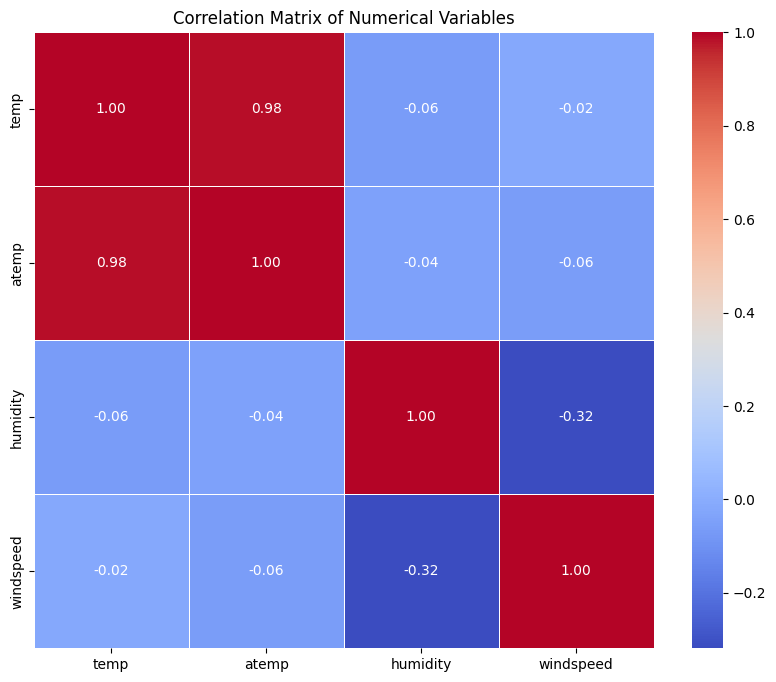

In [89]:
# Correlation matrix of numerical variables
corr_matrix = df[numerical_cols].corr()

# Heatmap to visualize the correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


#->> Observations
Identify which pairs of variables have strong correlations (e.g., temperature and humidity, or working day vs. count) -


*   Working days are more beneficial for the Yulu rentals
*   As temperature increases, humidity decreases slightly
*   As windspeed increases, humidity decreases by a lot


Notice how different weather or seasons may impact the number of cycles rented.



*   Light rain & snow decreases significantly compared to Clear & Cloudy weathers.
*   Heavy rain completely washes off the numbers of cycles rented on that particular weather.

#Hypothesis Testing (T-test, ANOVA, Chi-Square)

1. Two-Sample T-Test: Does Working Day Affect the Number of Electric Cycles Rented?

#####Null Hypothesis (H0): There is no difference in the number of cycles rented between working days and non-working days.

#####Alternative Hypothesis (H1): There is a significant difference in the number of cycles rented between working days and non-working days.

In [90]:
from scipy import stats

# Split data into working and non-working days
working_day = df[df['workingday'] == 1]['count']
non_working_day = df[df['workingday'] == 0]['count']

# Perform T-test
t_stat, p_value = stats.ttest_ind(working_day, non_working_day)

# Display the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Decision based on alpha = 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in rented cycles between working and non-working days.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in rented cycles between working and non-working days.")


T-statistic: 1.2096277376026694
P-value: 0.22644804226361348
Fail to reject the null hypothesis: There is no significant difference in rented cycles between working and non-working days.


2. ANOVA: Does Weather or Season Affect the Number of Cycles Rented?

Null Hypothesis (H0): There is no significant difference in the number of cycles rented across different weather or seasons.

Alternative Hypothesis (H1): There is a significant difference in the number of cycles rented across different weather or seasons.

In [91]:
# ANOVA for Weather
anova_weather = stats.f_oneway(df[df['weather'] == 1]['count'],
                               df[df['weather'] == 2]['count'],
                               df[df['weather'] == 3]['count'],
                               df[df['weather'] == 4]['count'])
print(f"ANOVA for Weather - P-value: {anova_weather.pvalue}")

# ANOVA for Season
anova_season = stats.f_oneway(df[df['season'] == 0]['count'],
                              df[df['season'] == 1]['count'],
                              df[df['season'] == 2]['count'],
                              df[df['season'] == 3]['count'])
print(f"ANOVA for Season - P-value: {anova_season.pvalue}")

# Decision based on

alpha = 0.05

if anova_weather.pvalue < alpha:
    print("Reject the null hypothesis: Weather has a significant effect on rented cycles.")
else:
    print("Fail to reject the null hypothesis: Weather does not affect rented cycles.")

if anova_season.pvalue < alpha:
    print("Reject the null hypothesis: Season has a significant effect on rented cycles.")
else:
    print("Fail to reject the null hypothesis: Season does not affect rented cycles.")


ANOVA for Weather - P-value: 5.482069475935669e-42
ANOVA for Season - P-value: nan
Reject the null hypothesis: Weather has a significant effect on rented cycles.
Fail to reject the null hypothesis: Season does not affect rented cycles.


3. Chi-Square Test: Is Weather Dependent on Season?

Null Hypothesis (H0): Weather is independent of the season.

Alternative Hypothesis (H1): Weather is dependent on the season.

In [92]:
# Create a contingency table for Weather and Season
weather_season_table = pd.crosstab(df['season'], df['weather'])

# Perform Chi-Square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(weather_season_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")

# Decision based on

alpha = 0.05


if p_val < alpha:
    print("Reject the null hypothesis: Weather is dependent on the season.")
else:
    print("Fail to reject the null hypothesis: Weather is independent of the season.")


Chi-Square Statistic: 49.158655596893624
P-value: 1.549925073686492e-07
Reject the null hypothesis: Weather is dependent on the season.


#Summary

Summarize the findings, such as whether working days, seasons, or weather conditions significantly influence the demand for electric cycles.

*   There is no significant difference in rented cycles between working and non-working days

*   Fail to reject the null hypothesis: Season does not affect rented cycles.

*   Reject the null hypothesis: Weather has a significant effect on rented cycles.

*   Reject the null hypothesis: Weather is dependent on the season.

#Recommendations for Yulu
Based on the analysis and test results, here are a few key recommendations that could help improve Yulu's business performance:


1. Optimize Pricing and Availability for Working Days:
If you find a significant difference in cycle rentals between working and non-working days, consider adjusting the pricing model, cycle availability, or marketing efforts to attract more users during non-working days when demand is typically lower to prevent revenue leakage.

2. Seasonal Promotions or Adjustments:
As the season significantly affects demand, develop marketing campaigns or incentives targeting spring season to drive more rentals, such as offering special rates and topical marketing campaigns, driving more awareness & running more of an PMC driven Ads.

3. Improve Infrastructure Based on Weather and Season Trends:
Ensure the availability of cycles in high-demand weather and seasons, such as spring or summer, by positioning bikes in high-footfall areas like metro stations or business hubs. This could help increase the customer base.

4. Monitor Working Day Performance:
Since the number of rented cycles could be higher on working days, focus on improving the user experience for delivery partners, Q-Commerce Courier delivery partners & Students. This may include increasing the number of cycles at Restaurants, Near colleges, business parks & metro stations.

